<a href="https://colab.research.google.com/github/sharma289/Zorang-Recruitment-Project/blob/main/Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

**Objective:** To design and create algorithm for finding the optimal routes for delivery agents to deliver
parcels from a store to consumers.



**Requirements and constraints:**

● There are 100 orders which are to be delivered by 10 delivery agents.

● There is one store location from where all orders will be delivered and after
finishing the deliveries, the agents will come back to the store.

● You are given 100 random addresses where parcels are to be delivered.

● Map an optimal route for each delivery person for doing the deliveries and in
what order they will do the deliveries.

● It is not required that all delivery agents will deliver the same number of orders.

● Each delivery agent can pick multiple orders in one trip. Each agent will deliver at
least one order.


**Assumptions:**

● All 100 orders are ready at the same time.

● All delivery agents go at the same speed.

● Consider straight line distance between any two coordinates.


**Problem:**
Design optimal routes for all 10 delivery agents so that all packages are delivered and
delivery agents return to the store in shortest amount of time.

In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn --quiet

In [ ]:
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Read and print the location ID, Latitude and longitude.

In [ ]:
with open('Locations.txt','r') as f:
    data = f.read()
inputs = json.loads(data)

In [ ]:
print(inputs)

[{'_id': 1, 'latitude': 77.26398177444935, 'longitude': 29.08908139212639}, {'_id': 2, 'latitude': 77.2652468523133, 'longitude': 29.092540182173252}, {'_id': 3, 'latitude': 77.26404986407397, 'longitude': 29.09916289150715}, {'_id': 4, 'latitude': 77.26563535630703, 'longitude': 29.095355203949506}, {'_id': 5, 'latitude': 77.26583819836377, 'longitude': 29.095966333768118}, {'_id': 6, 'latitude': 77.26591865459652, 'longitude': 29.096030741930008}, {'_id': 7, 'latitude': 77.26655669510365, 'longitude': 29.096778433551563}, {'_id': 8, 'latitude': 77.26625794215028, 'longitude': 29.10057406872511}, {'_id': 9, 'latitude': 77.26653425798689, 'longitude': 29.09987032413483}, {'_id': 10, 'latitude': 77.26763392032183, 'longitude': 29.09902442246675}, {'_id': 11, 'latitude': 77.26816771909714, 'longitude': 29.100369215011597}, {'_id': 12, 'latitude': 77.26838428527117, 'longitude': 29.106186546794223}, {'_id': 13, 'latitude': 77.26839568465948, 'longitude': 29.10613791918116}, {'_id': 14, 'l

In [ ]:
ids = []
latitudes = []
longitudes = []

In [ ]:
for d in inputs:
    ids.append(d['_id'])
    latitudes.append(d['latitude'])
    longitudes.append(d['longitude'])

In [ ]:
store = [28.9428,77.2276]
agents = 10

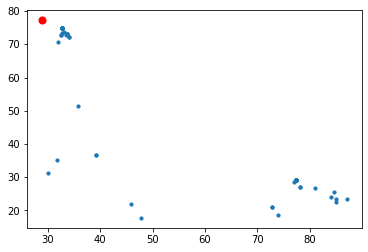

In [ ]:
plt.scatter(latitudes,longitudes,s=10)
plt.scatter(store[0],store[1],c = 'red',s=50)
plt.show()

In [ ]:
data = []
for i in range(len(latitudes)):
    data.append([latitudes[i],longitudes[i]])

In [ ]:
X = pd.DataFrame(data,columns=['Latitude','Longitude'])

## We make clusters to decide the locations of delivery address.

Clusters will help to decide how the agents will deliver packages to the address.

Locations which are close to each other will become a cluster and a single delivery agent will sent to that cluster to deliver the package.

In [ ]:
model = KMeans(n_clusters = agents, init='k-means++', random_state=42)

In [ ]:
model.fit(X)

KMeans(n_clusters=10, random_state=42)

In [ ]:
preds = model.predict(X)
print(preds)

[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 2 2 2 6 6 6 4 4 4 4 4 3 3 0 0 5 9 7 7
 9 7 7 7 7 7 7 7 7 7 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 7 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
X['Agent'] = preds

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


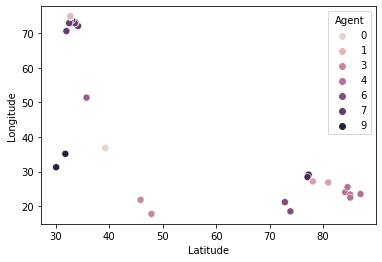

In [ ]:
sns.scatterplot(X['Latitude'],X['Longitude'],hue=X['Agent'],s=50);

In [ ]:
X['ID'] = ids

In [ ]:
def get_dist(coord):
    return math.sqrt((store[0]-coord[0])**2 + (store[1]-coord[1])**2)

In [ ]:
distance = []
for i in range(len(latitudes)):
    distance.append(get_dist([latitudes[i],longitudes[i]]))
X['Distance'] = distance

In [ ]:
output = [[] for _ in range(agents)]
for x,i in enumerate(X['Agent']):
    output[i].append(X['ID'][x])

In [ ]:
print(output)

[[32, 33], [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], [19, 20, 21], [30, 31], [25, 26, 27, 28, 29], [34], [22, 23, 24], [36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 84], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], [35, 38]]


In [ ]:
X

,Latitude,Longitude,Agent,ID,Distance
0,77.263982,29.089081,8,1,68.207431
1,77.265247,29.092540,8,2,68.205886
2,77.264050,29.099163,8,3,68.200364
3,77.265635,29.095355,8,4,68.204174
4,77.265838,29.095966,8,5,68.203887
...,...,...,...,...,...
95,32.700267,74.867951,1,96,4.436948
96,32.698180,74.861111,1,97,4.438823
97,32.697882,74.861696,1,98,4.438259
98,32.697494,74.861595,1,99,4.437985


## Arranging the order of delivery to optimize the time of delivery.

Let's decide the order of delivery.

Location which is nearest to the store will be delivered first and then sencond nearest one and so on.

In [ ]:
output = [[] for _ in range(agents)]
_dict = {}
for x,i in enumerate(X['Agent'].unique()):
    a = list(X[X.Agent==i]['ID'])
    b = list(X[X.Agent==i]['Distance'])
    _dict = {a[i]:b[i] for i in range(len(a))}
    _dict = sorted(_dict.items(), key=lambda kv:(kv[1], kv[0]))
    for j in _dict:
        output[x].append(j[0])

## Below is the array that contain addresses id that agent will deliver and in order they deliver.

In [ ]:
print(output)

[[17, 15, 12, 13, 14, 16, 3, 8, 9, 11, 10, 7, 5, 6, 4, 2, 1, 18], [19, 20, 21], [23, 24, 22], [26, 25, 27, 28, 29], [31, 30], [32, 33], [34], [35, 38], [45, 46, 48, 47, 43, 42, 41, 40, 44, 39, 84, 37, 36], [100, 96, 99, 98, 87, 86, 97, 85, 92, 95, 93, 94, 90, 89, 88, 91, 83, 82, 79, 81, 80, 78, 77, 76, 75, 71, 69, 72, 73, 70, 66, 74, 62, 63, 64, 65, 60, 61, 57, 68, 67, 59, 56, 54, 53, 58, 52, 55, 50, 51, 49]]
